<a href="https://colab.research.google.com/github/younghoonNa/pythonDT/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_7%EC%9D%BC%EC%B0%A8_%EC%9D%B4%EB%A1%A0_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jan  4 01:46:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    58W / 149W |    159MiB / 11441MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [ ]:
print(x_train[1])
print(len(x_train[1]))

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
189


In [ ]:
x_train.shape #25000 뒤에 아무것도 안오는 이유 > 뒤에 오는게 다르기 때문

(25000,)

In [ ]:
word_index = imdb.get_word_index() #단어 사전
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
#word index 형태를 -> index word 형태로 바꾸기
index_word = dict([(index, word)for (word, index) in word_index.items()])
index_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
review = ' '.join([index_word.get(index-3, '?') for index in x_train[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
#One-Hot을 사용하여 2차원 데이터로 변환
x_train[0][:5]

[1, 14, 22, 16, 43]

In [ ]:
def vectorize_sequence(sequences,dimension=10000):
  #0으로 채워진 (25000, 10000) 배열이 생성
  #자주 쓰는 단어 10000개만 채우기 때문
  result = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences): #리뷰를 하나씩 반환
    result[i, sequence] = 1. #실수데이터가 연산이 더 빠르기 때문에
  return result

In [ ]:
import numpy as np
x_train_v = vectorize_sequence(x_train)
x_train_v.shape

(25000, 10000)

In [ ]:
x_test_v = vectorize_sequence(x_test)
x_test_v.shape

(25000, 10000)

In [ ]:
#은닉층1 (출력층 포함)  : 64 unit, 'relu'
#은닉층2             : 64 unit, 'relu'
#출력층              : 이진분류에 맞게끔 설정

#summary 함수의 결과 중 total params 함수가 644,289면 일치



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
#모델 구성 방법 : 순차구성 (입력층 , 은닉층, 출력층)
#순차구성 -> Sequential 
model = Sequential() #Layer를 담는 상자. -> 여기에 Layer를 쌓아보자.!! -> Layerd 추가

#13개의 입력값이 들어온다. 379는 필요없음. 13개의 데이터를 받는 입력층 완성
# model.add(InputLayer(input_shape=(10000,))) #입력층 추가 (생략, 간략화 가능.)
#Dense는 2D를 입력으로 받음.
model.add(Dense(64, activation = 'relu', input_shape=(10000,))) # 은닉층 추가.
model.add(Dense(64, activation = 'relu')) # 은닉층 추가.
model.add(Dense(1, activation = 'sigmoid')) # 입력층 규칙은 -> 입력 shape , 은닉층은 자유자재,  출력층은 Dense Layer 사용 (회기나 분류시)
#유닛의 개수
#회기 (예측하고자 하는 수의 개수 -> y컬럼 개수)
#분류 (예측하고자 하는 범주의 개수 -> 예측하고자 하는 범주의 개수)

#활성화 함수
#회기 - (미지정)
#분류 - (sigmoid, softmax)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습과정 설정 
 # optimizer='adam', loss='binary_crossentropy'
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
#학습
model.fit(x_train_v, y_train, epochs = 20, batch_size = 512, validation_data = (x_test_v, y_test))

Epoch 1/20
49/49 [==============================] - 4s 76ms/step - loss: 1.9509e-04 - val_loss: 1.0125
Epoch 2/20
49/49 [==============================] - 1s 31ms/step - loss: 1.7155e-04 - val_loss: 1.0227
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 1.5188e-04 - val_loss: 1.0350
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 1.3529e-04 - val_loss: 1.0445
Epoch 5/20
49/49 [==============================] - 1s 30ms/step - loss: 1.2136e-04 - val_loss: 1.0541
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 1.0941e-04 - val_loss: 1.0621
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 9.9172e-05 - val_loss: 1.0725
Epoch 8/20
49/49 [==============================] - 1s 31ms/step - loss: 9.0174e-05 - val_loss: 1.0814
Epoch 9/20
49/49 [==============================] - 1s 30ms/step - loss: 8.2401e-05 - val_loss: 1.0890
Epoch 10/20
49/49 [==============================] - 2s 31ms/step - loss:

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [18]:
from tensorflow.keras.datasets import mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [20]:
#이미지 데이터화 4D Tensor
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1,28,28, 1)

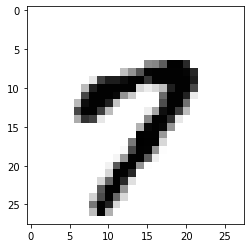

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[15, :, :, 0], cmap='binary')

In [22]:
x_train = x_train / 255.
x_test = x_test / 255.

In [24]:
model = Sequential()
#64개 입력 3x3 필터
model.add(Conv2D(64,(3,3), activation='relu'))

In [25]:
from tensorflow.keras.layers import Flatten
# 특징 추출기
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten()) # nD > 2D (Dense에 입력으로 변경)
# 특징 분류기
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax')) # 출력층

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [27]:
history = model.fit(x_train, y_train,
                    epochs=50, batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/50
469/469 [==============================] - 20s 25ms/step - loss: 0.1262 - acc: 0.9612 - val_loss: 0.0460 - val_acc: 0.9847
Epoch 2/50
469/469 [==============================] - 11s 24ms/step - loss: 0.0355 - acc: 0.9893 - val_loss: 0.0382 - val_acc: 0.9866
Epoch 3/50
469/469 [==============================] - 11s 24ms/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0372 - val_acc: 0.9883
Epoch 4/50
469/469 [==============================] - 11s 24ms/step - loss: 0.0155 - acc: 0.9950 - val_loss: 0.0345 - val_acc: 0.9899
Epoch 5/50
469/469 [==============================] - 12s 25ms/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.0303 - val_acc: 0.9916
Epoch 6/50
469/469 [==============================] - 11s 24ms/step - loss: 0.0101 - acc: 0.9970 - val_loss: 0.0384 - val_acc: 0.9893
Epoch 7/50
469/469 [==============================] - 11s 24ms/step - loss: 0.0085 - acc: 0.9971 - val_loss: 0.0417 - val_acc: 0.9886
Epoch 8/50
469/469 [==============================] - 11s 24ms

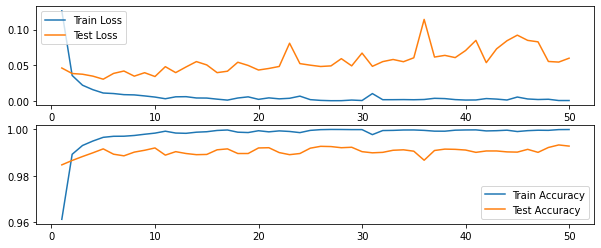

In [28]:
plt.figure(figsize=(10,4))
plt.subplot(2, 1, 1)
plt.plot(range(1, 51), history.history['loss'], label='Train Loss')
plt.plot(range(1, 51), history.history['val_loss'], label='Test Loss')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(range(1, 51), history.history['acc'], label='Train Accuracy')
plt.plot(range(1, 51), history.history['val_acc'], label='Test Accuracy')
plt.legend()